In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("GlobalWeatherRepository.csv")
df= data

In [3]:
print(df.head()) 

       country     location_name  latitude  longitude        timezone  \
0  Afghanistan             Kabul     34.52      69.18      Asia/Kabul   
1      Albania            Tirana     41.33      19.82   Europe/Tirane   
2      Algeria           Algiers     36.76       3.05  Africa/Algiers   
3      Andorra  Andorra La Vella     42.50       1.52  Europe/Andorra   
4       Angola            Luanda     -8.84      13.23   Africa/Luanda   

   last_updated_epoch      last_updated  temperature_celsius  \
0          1715849100  2024-05-16 13:15                 26.6   
1          1715849100  2024-05-16 10:45                 19.0   
2          1715849100  2024-05-16 09:45                 23.0   
3          1715849100  2024-05-16 10:45                  6.3   
4          1715849100  2024-05-16 09:45                 26.0   

   temperature_fahrenheit condition_text  ...  air_quality_PM2.5  \
0                    79.8  Partly Cloudy  ...                8.4   
1                    66.2  Partly cloudy

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46382 entries, 0 to 46381
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       46382 non-null  object 
 1   location_name                 46382 non-null  object 
 2   latitude                      46382 non-null  float64
 3   longitude                     46382 non-null  float64
 4   timezone                      46382 non-null  object 
 5   last_updated_epoch            46382 non-null  int64  
 6   last_updated                  46382 non-null  object 
 7   temperature_celsius           46382 non-null  float64
 8   temperature_fahrenheit        46382 non-null  float64
 9   condition_text                46382 non-null  object 
 10  wind_mph                      46382 non-null  float64
 11  wind_kph                      46382 non-null  float64
 12  wind_degree                   46382 non-null  int64  
 13  w

In [5]:
print(df.describe())

           latitude     longitude  last_updated_epoch  temperature_celsius  \
count  46382.000000  46382.000000        4.638200e+04         46382.000000   
mean      19.143613     22.211533        1.726182e+09            23.351363   
std       24.482551     65.781660        6.013071e+06             8.935678   
min      -41.300000   -175.200000        1.715849e+09           -24.800000   
25%        3.750000     -6.250000        1.720876e+09            18.800000   
50%       17.250000     23.320000        1.726231e+09            25.400000   
75%       40.400000     50.580000        1.731402e+09            29.000000   
max       64.150000    179.220000        1.736509e+09            49.200000   

       temperature_fahrenheit      wind_mph      wind_kph   wind_degree  \
count            46382.000000  46382.000000  46382.000000  46382.000000   
mean                74.033882      8.312651     13.381881    171.577595   
std                 16.084218     10.050938     16.174355    102.863233 

# MISSING VALUES

In [6]:
print(df.isnull().sum())

country                         0
location_name                   0
latitude                        0
longitude                       0
timezone                        0
last_updated_epoch              0
last_updated                    0
temperature_celsius             0
temperature_fahrenheit          0
condition_text                  0
wind_mph                        0
wind_kph                        0
wind_degree                     0
wind_direction                  0
pressure_mb                     0
pressure_in                     0
precip_mm                       0
precip_in                       0
humidity                        0
cloud                           0
feels_like_celsius              0
feels_like_fahrenheit           0
visibility_km                   0
visibility_miles                0
uv_index                        0
gust_mph                        0
gust_kph                        0
air_quality_Carbon_Monoxide     0
air_quality_Ozone               0
air_quality_Ni

In [7]:
missing_percentage = df.isnull().mean() * 100
print(missing_percentage)

country                         0.0
location_name                   0.0
latitude                        0.0
longitude                       0.0
timezone                        0.0
last_updated_epoch              0.0
last_updated                    0.0
temperature_celsius             0.0
temperature_fahrenheit          0.0
condition_text                  0.0
wind_mph                        0.0
wind_kph                        0.0
wind_degree                     0.0
wind_direction                  0.0
pressure_mb                     0.0
pressure_in                     0.0
precip_mm                       0.0
precip_in                       0.0
humidity                        0.0
cloud                           0.0
feels_like_celsius              0.0
feels_like_fahrenheit           0.0
visibility_km                   0.0
visibility_miles                0.0
uv_index                        0.0
gust_mph                        0.0
gust_kph                        0.0
air_quality_Carbon_Monoxide 

In [8]:
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 0


In [9]:
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    print(f"{col}: {df[col].nunique()} unique values")

country: 210 unique values
location_name: 248 unique values
timezone: 190 unique values
last_updated: 7669 unique values
condition_text: 44 unique values
wind_direction: 16 unique values
sunrise: 434 unique values
sunset: 534 unique values
moonrise: 1441 unique values
moonset: 1441 unique values
moon_phase: 8 unique values


In [10]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

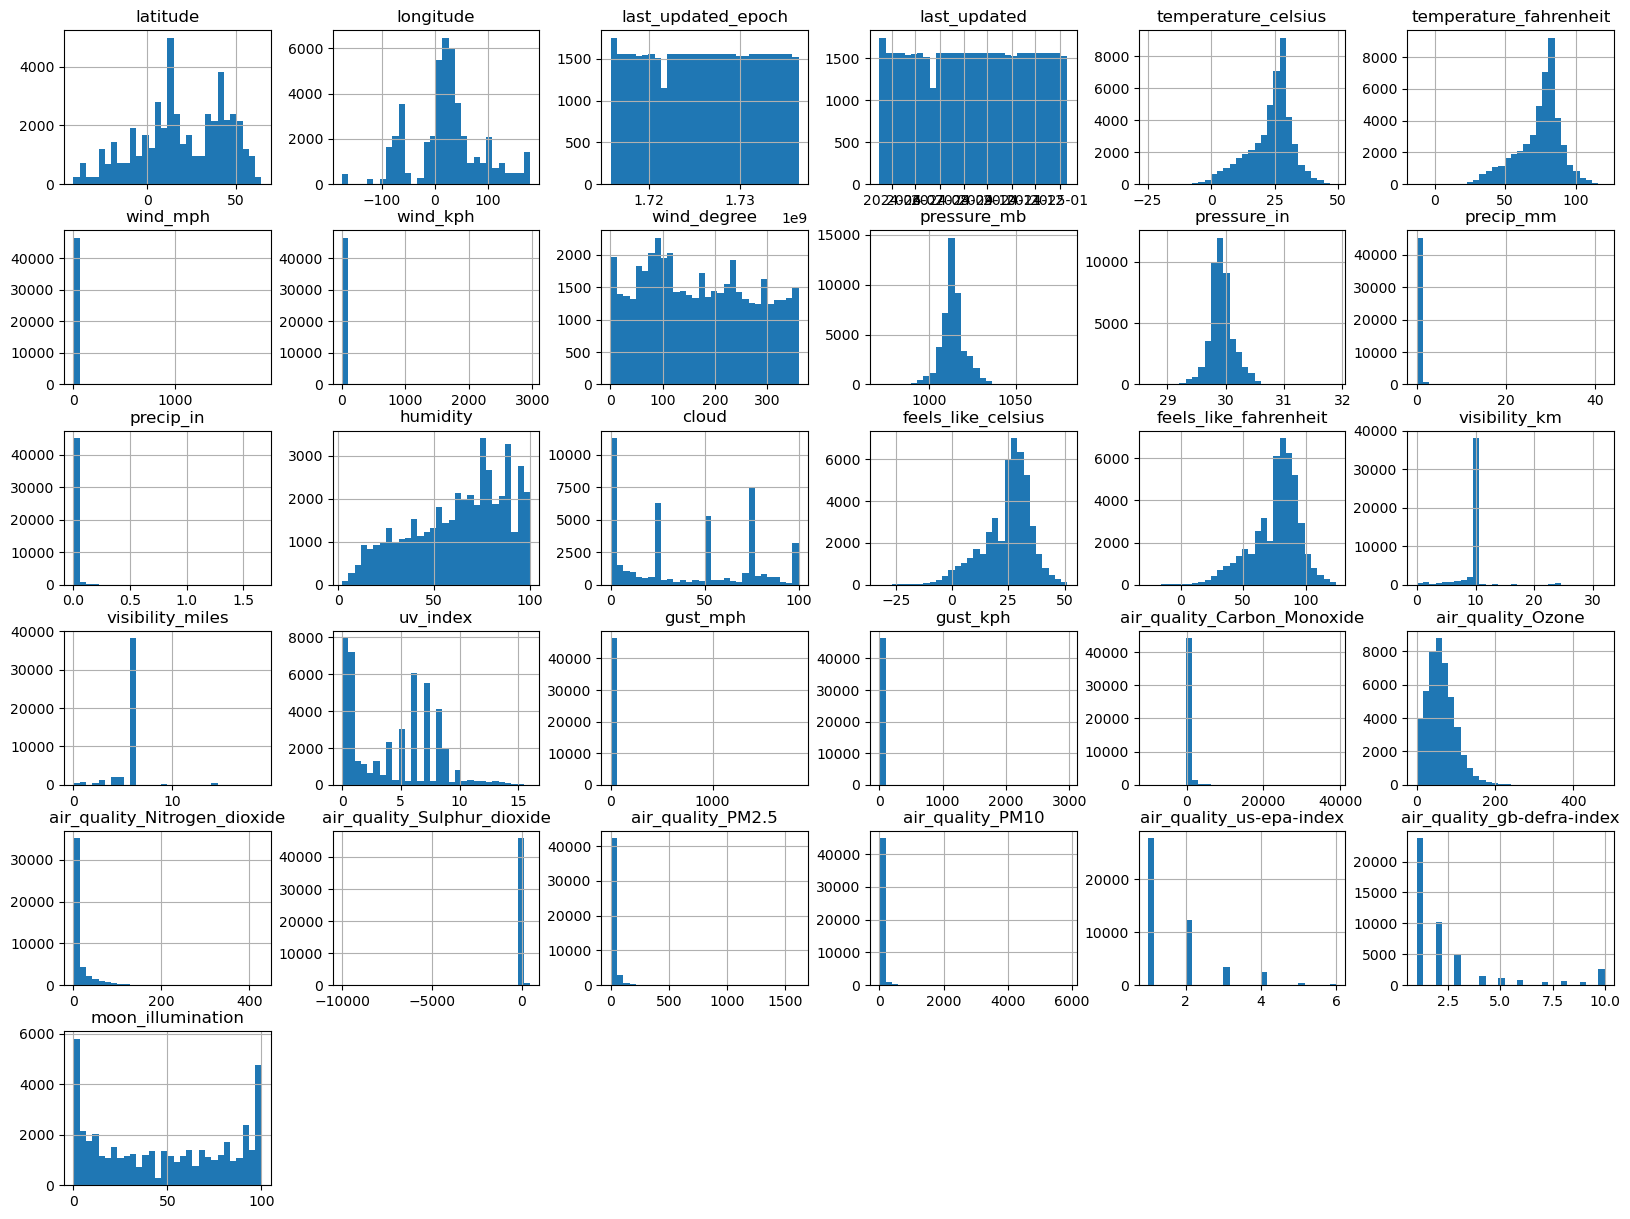

In [12]:
df.hist(figsize=(20,15), bins=30)
plt.show()

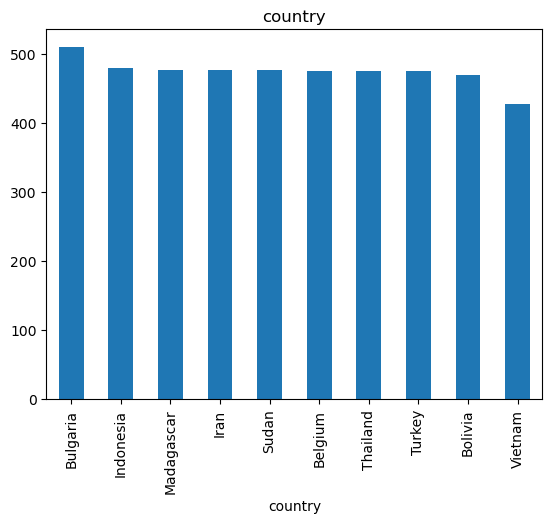

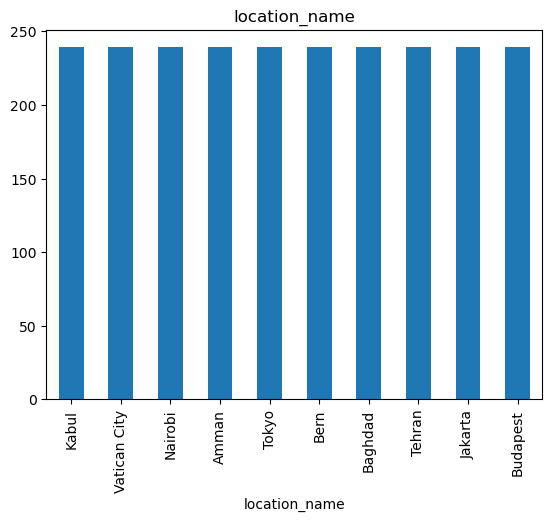

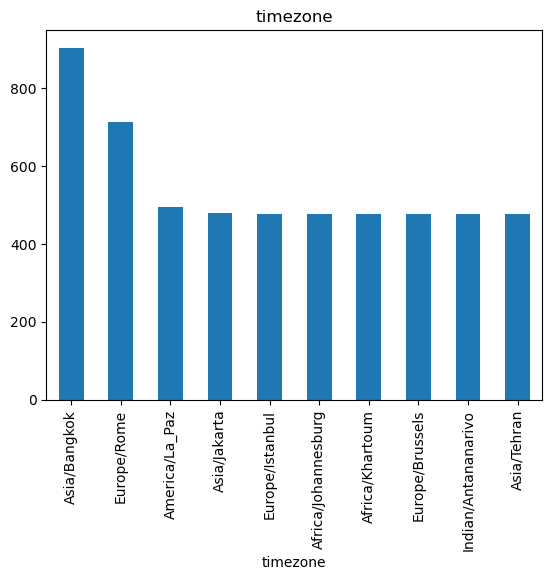

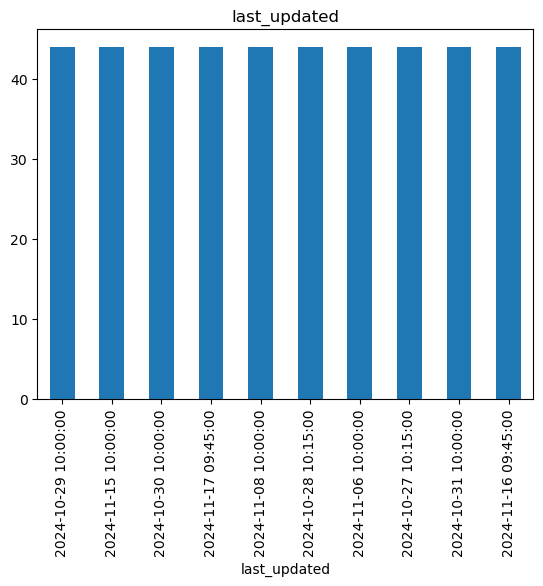

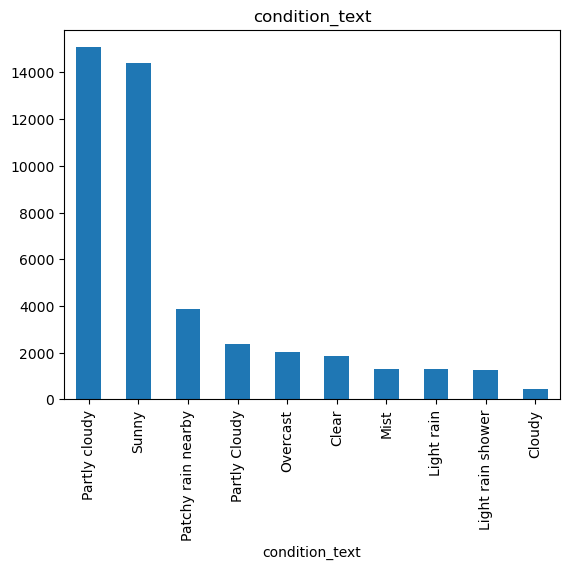

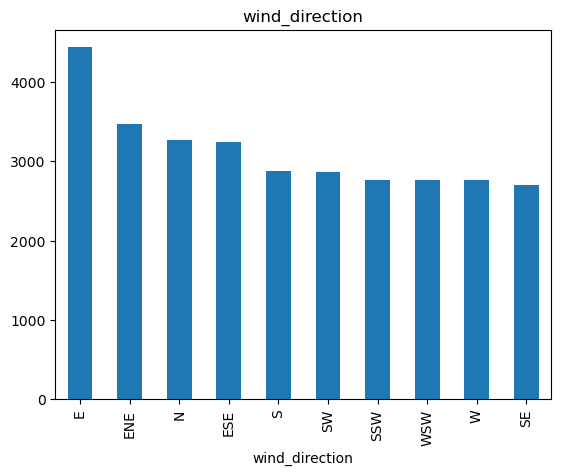

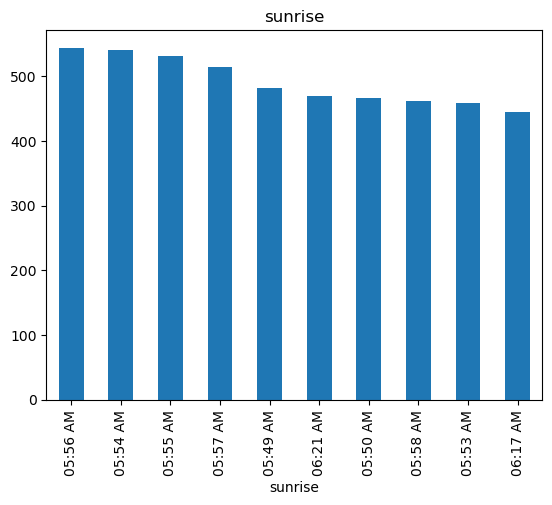

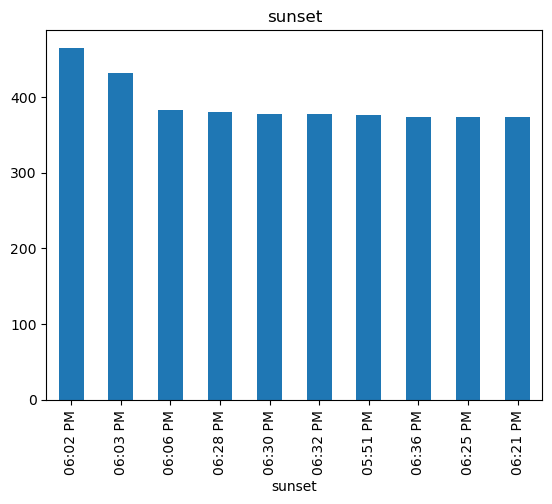

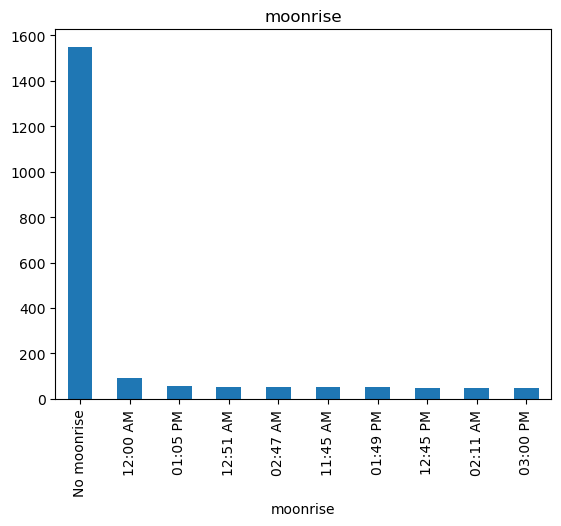

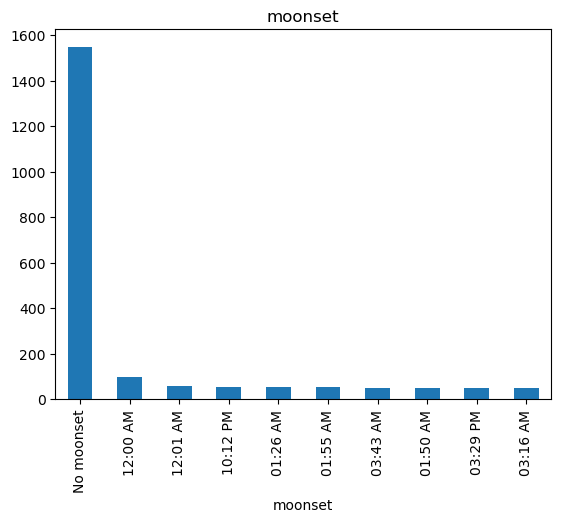

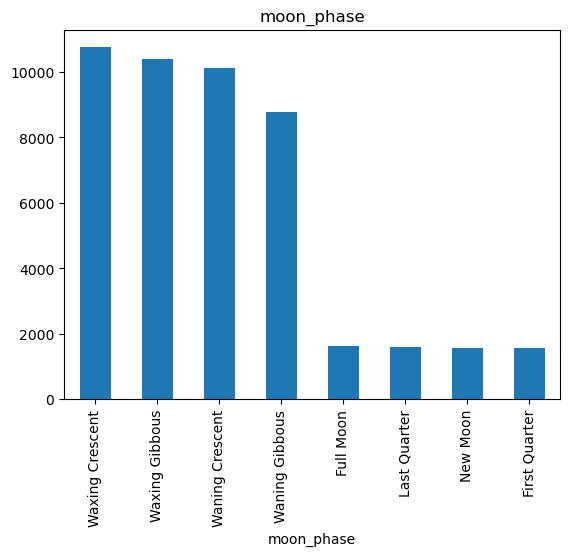

In [13]:
for col in categorical_cols:
    df[col].value_counts().head(10).plot(kind='bar')
    plt.title(col)
    plt.show()

# DATA CLEANING & PREPROCESSING

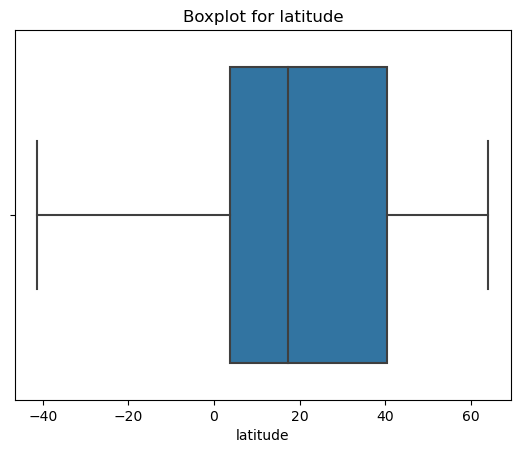

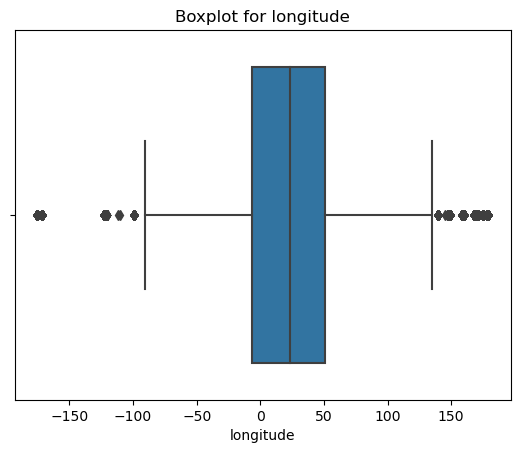

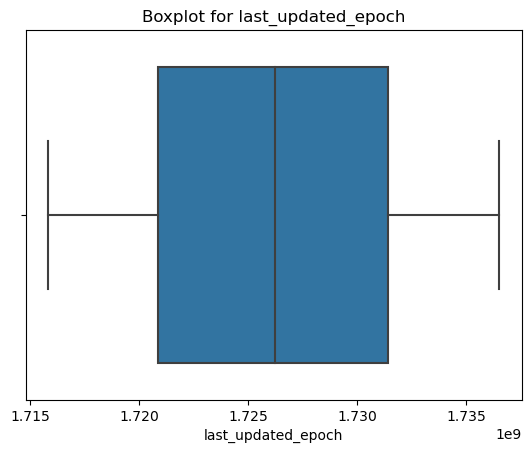

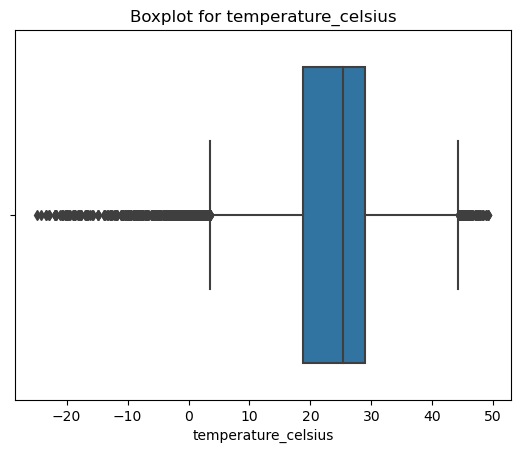

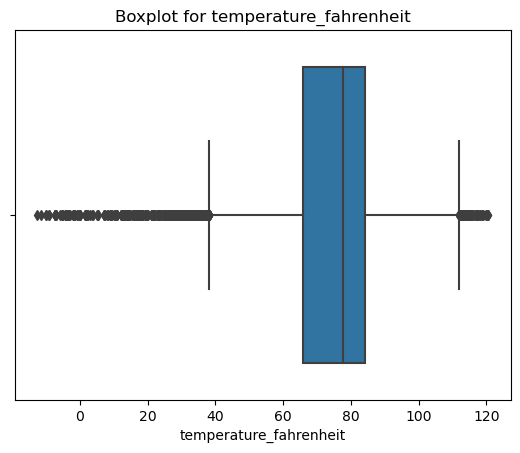

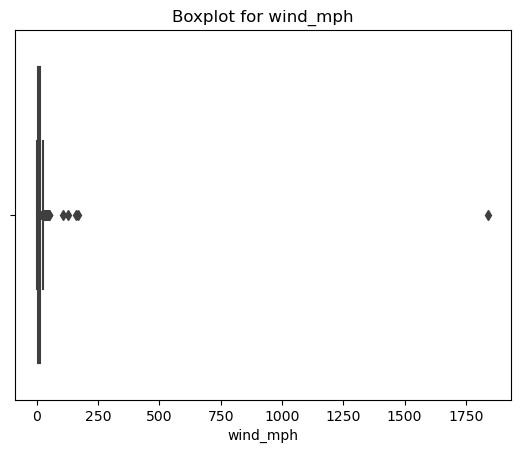

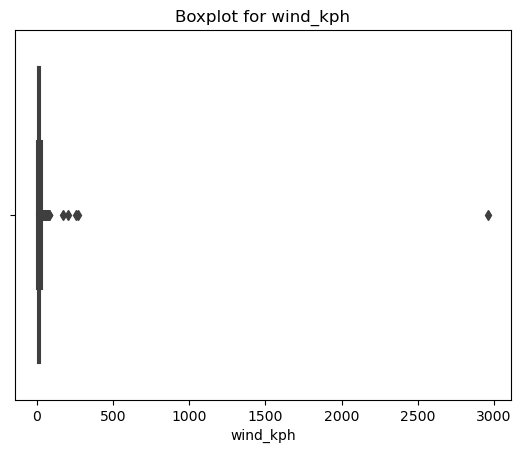

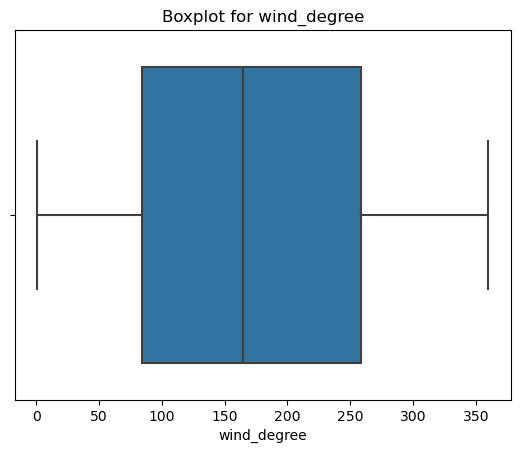

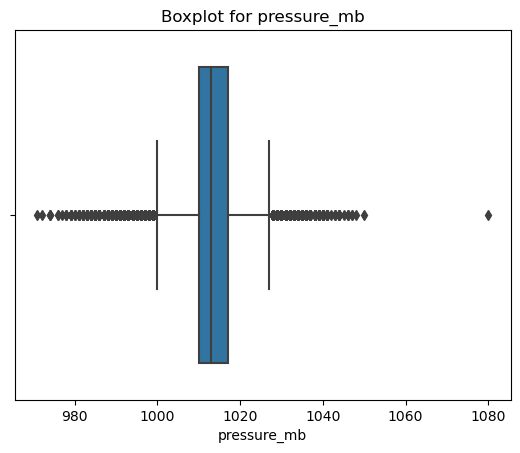

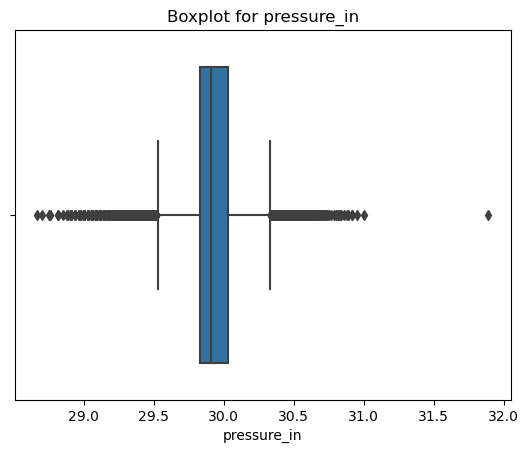

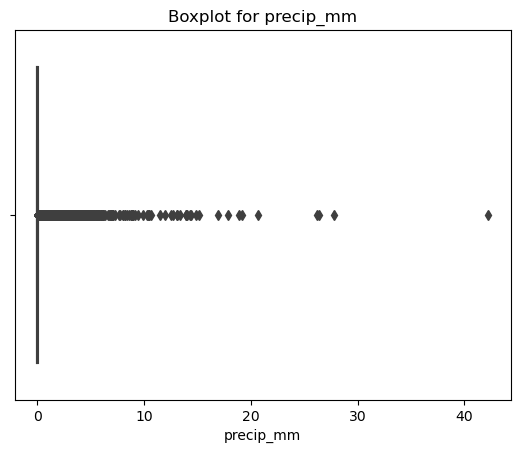

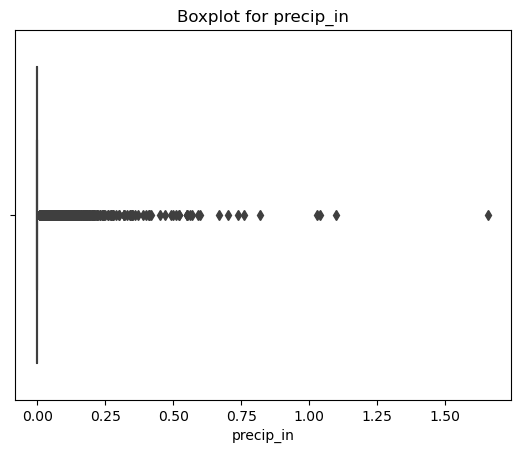

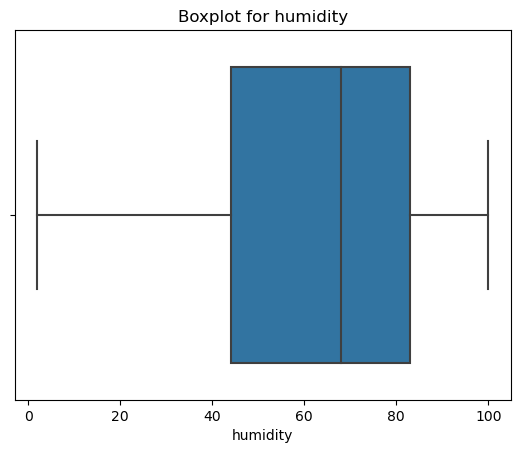

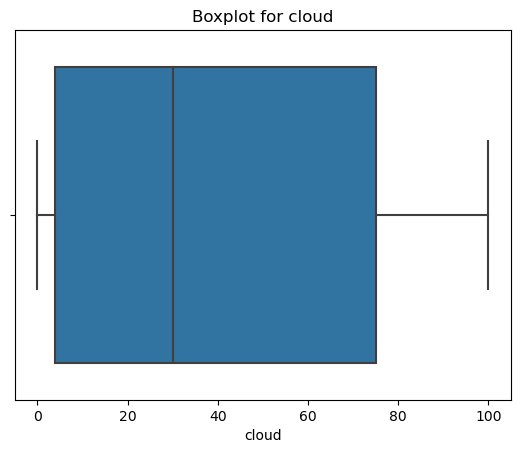

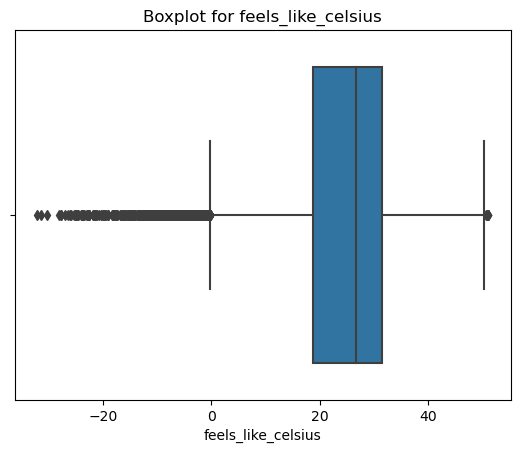

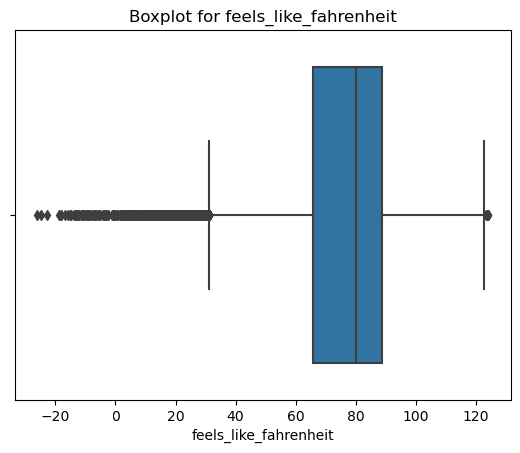

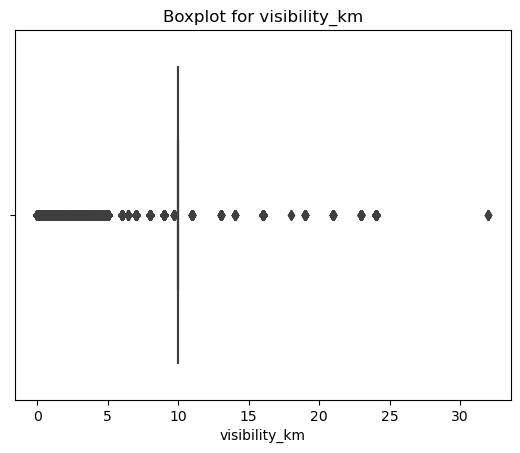

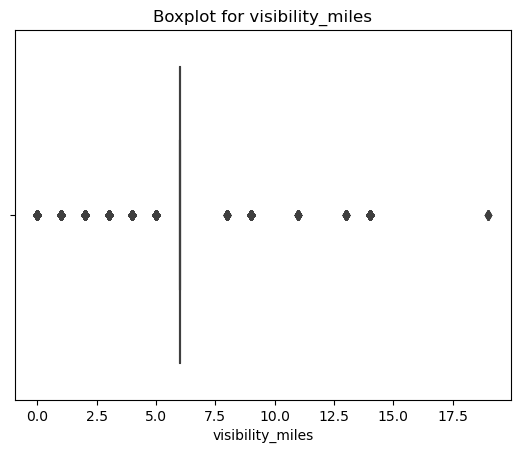

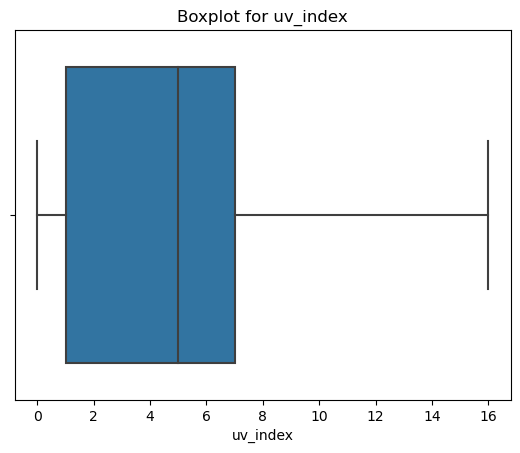

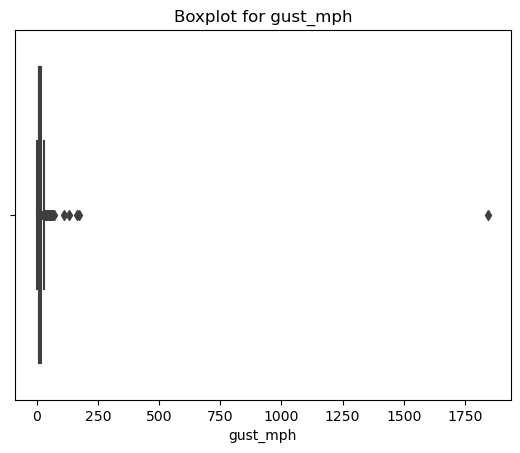

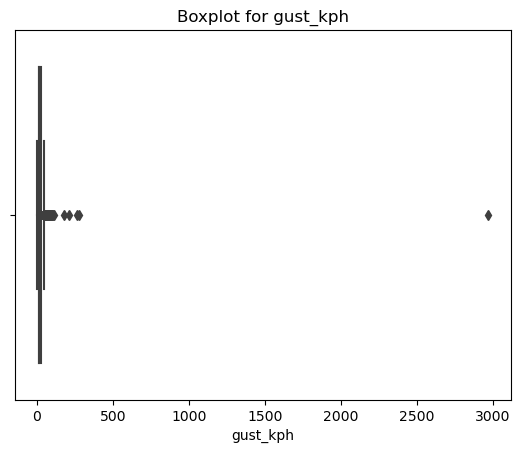

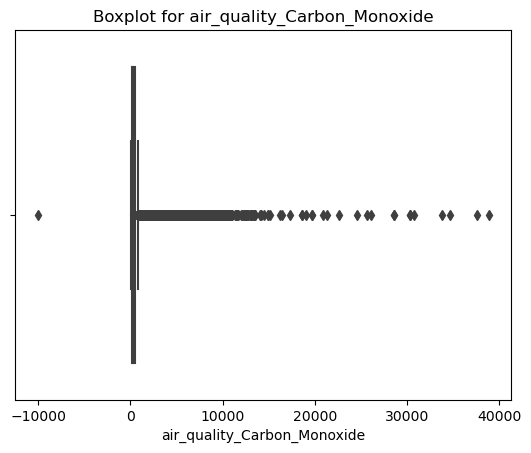

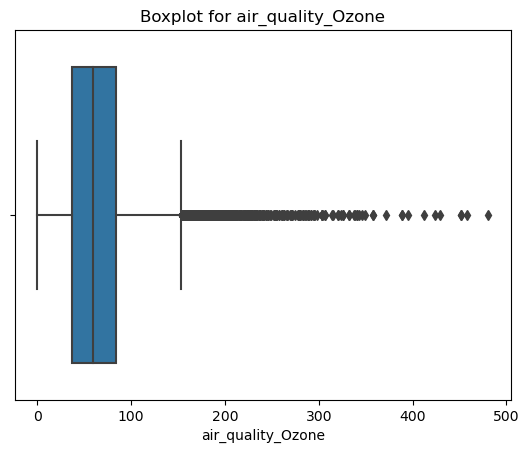

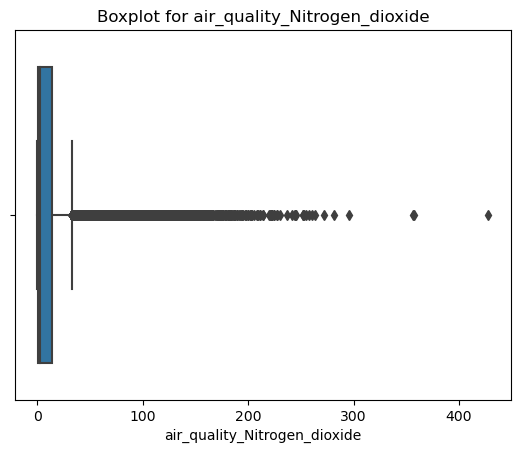

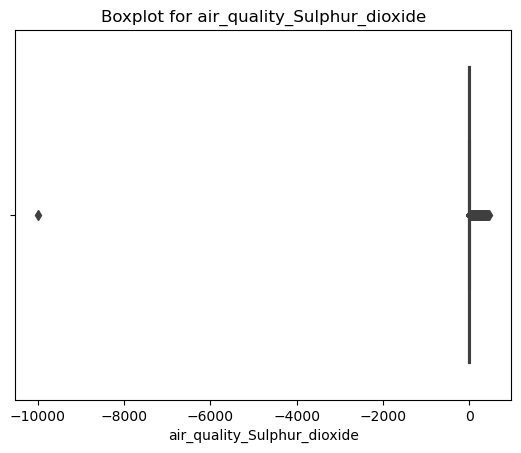

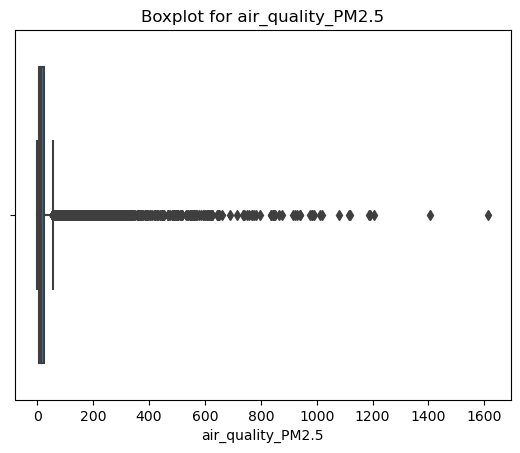

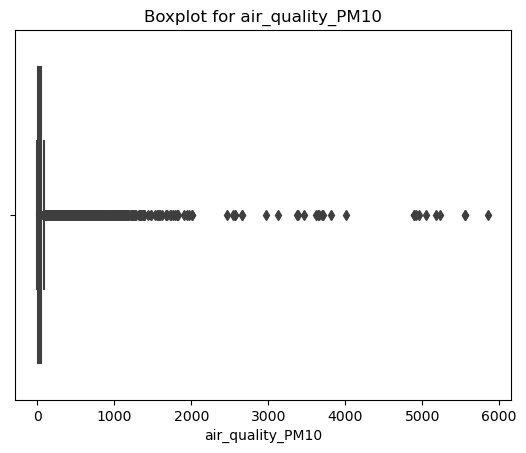

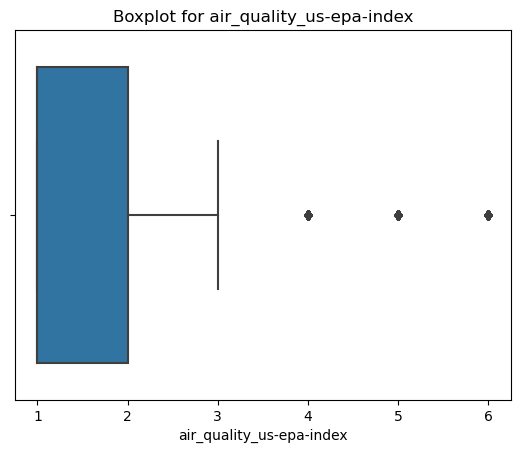

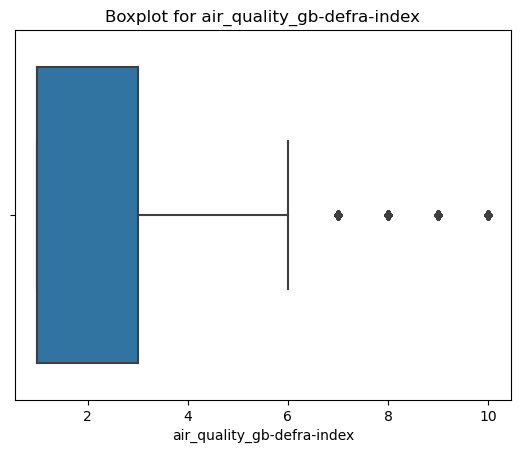

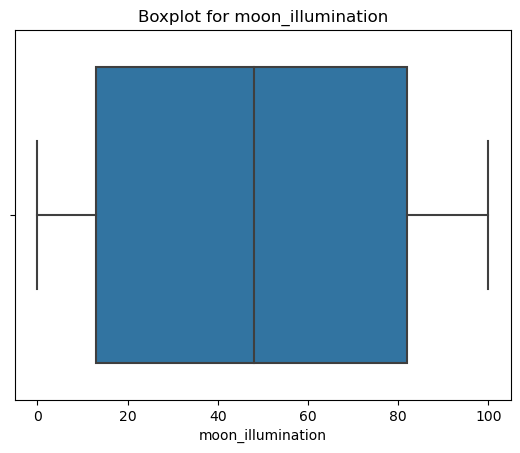

In [14]:
#Visualize extreme values
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

In [15]:
#Handling outliers
for col in numerical_cols:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_limit, upper_limit)

In [16]:
print(df.columns)

Index(['country', 'location_name', 'latitude', 'longitude', 'timezone',
       'last_updated_epoch', 'last_updated', 'temperature_celsius',
       'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph',
       'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in',
       'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius',
       'feels_like_fahrenheit', 'visibility_km', 'visibility_miles',
       'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide',
       'air_quality_Ozone', 'air_quality_Nitrogen_dioxide',
       'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10',
       'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise',
       'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination'],
      dtype='object')


In [17]:
#Normalize numerical features
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [19]:
df['last_updated'] = pd.to_datetime(df['last_updated'])

# Encoding

In [20]:
print(df.columns.to_list())

['country', 'location_name', 'latitude', 'longitude', 'timezone', 'last_updated_epoch', 'last_updated', 'temperature_celsius', 'temperature_fahrenheit', 'condition_text', 'wind_mph', 'wind_kph', 'wind_degree', 'wind_direction', 'pressure_mb', 'pressure_in', 'precip_mm', 'precip_in', 'humidity', 'cloud', 'feels_like_celsius', 'feels_like_fahrenheit', 'visibility_km', 'visibility_miles', 'uv_index', 'gust_mph', 'gust_kph', 'air_quality_Carbon_Monoxide', 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 'air_quality_PM10', 'air_quality_us-epa-index', 'air_quality_gb-defra-index', 'sunrise', 'sunset', 'moonrise', 'moonset', 'moon_phase', 'moon_illumination']


In [21]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['country'] = le.fit_transform(df['country'])

In [22]:
#Map timezones to UTC offsets
timezone_offsets = {'GMT': 0, 'EST': -5, 'PST': -8}
df['timezone_offset'] = df['timezone'].map(timezone_offsets)

In [23]:
df['last_updated'] = pd.to_datetime(df['last_updated'])
df['year'] = df['last_updated'].dt.year
df['month'] = df['last_updated'].dt.month
df['day'] = df['last_updated'].dt.day
df['hour'] = df['last_updated'].dt.hour
df['minute'] = df['last_updated'].dt.minute

In [24]:
df = pd.get_dummies(df, columns=['condition_text'], drop_first=True)

In [25]:
wind_direction_mapping = {
    'N': 0, 'NE': 45, 'E': 90, 'SE': 135,
    'S': 180, 'SW': 225, 'W': 270, 'NW': 315
}
df['wind_direction_angle'] = df['wind_direction'].map(wind_direction_mapping)

In [26]:
df['sunrise_seconds'] = pd.to_datetime(df['sunrise'], format='%I:%M %p').dt.hour * 3600 + \
                        pd.to_datetime(df['sunrise'], format='%I:%M %p').dt.minute * 60
df['sunset_seconds'] = pd.to_datetime(df['sunset'], format='%I:%M %p').dt.hour * 3600 + \
                       pd.to_datetime(df['sunset'], format='%I:%M %p').dt.minute * 60

In [27]:
moon_phase_mapping = {
    'New Moon': 0, 'Waxing Crescent': 1, 'First Quarter': 2,
    'Waxing Gibbous': 3, 'Full Moon': 4, 'Waning Gibbous': 5,
    'Last Quarter': 6, 'Waning Crescent': 7
}
df['moon_phase_encoded'] = df['moon_phase'].map(moon_phase_mapping)

In [28]:
df['moonrise'].replace('No moonrise', '00:00 AM', inplace=True)
# Convert valid moonrise times to seconds since midnight
df['moonrise_seconds'] = pd.to_datetime(df['moonrise'], format='%I:%M %p', errors='coerce').dt.hour * 3600 + \
                          pd.to_datetime(df['moonrise'], format='%I:%M %p', errors='coerce').dt.minute * 60

In [29]:
df['moonset'].replace('No moonset', '00:00 AM', inplace=True)
# Convert valid moonset times to seconds since midnight
df['moonset_seconds'] = pd.to_datetime(df['moonset'], format='%I:%M %p', errors='coerce').dt.hour * 3600 + \
                        pd.to_datetime(df['moonset'], format='%I:%M %p', errors='coerce').dt.minute * 60

In [30]:
# Handling missing values
# Filling missing numerical values with the mean
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].mean())

# Filling missing categorical values with the mode
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Checking for missing values after imputation
print("Remaining missing values:\n", df.isnull().sum())

# Handling outliers using capping (1st and 99th percentile)
for col in numerical_cols:
    lower_limit = df[col].quantile(0.01)
    upper_limit = df[col].quantile(0.99)
    df[col] = np.clip(df[col], lower_limit, upper_limit)

# Normalizing numerical data (Min-Max Scaling)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# Displaying the cleaned and preprocessed data
print(df.head())

Remaining missing values:
 country               0
location_name         0
latitude              0
longitude             0
timezone              0
                     ..
sunrise_seconds       0
sunset_seconds        0
moon_phase_encoded    0
moonrise_seconds      0
moonset_seconds       0
Length: 95, dtype: int64
   country     location_name  latitude  longitude        timezone  \
0        0             Kabul  0.731230   0.688026      Asia/Kabul   
1        1            Tirana  0.802572   0.547056   Europe/Tirane   
2        2           Algiers  0.754696   0.499162  Africa/Algiers   
3        3  Andorra La Vella  0.814829   0.494793  Europe/Andorra   
4        4            Luanda  0.276987   0.528236   Africa/Luanda   

   last_updated_epoch        last_updated  temperature_celsius  \
0                 0.0 2024-05-16 13:15:00             0.656325   
1                 0.0 2024-05-16 10:45:00             0.474940   
2                 0.0 2024-05-16 09:45:00             0.570406   
3    

C:\Users\srush\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return bound(*args, **kwds)
C:\Users\srush\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\srush\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


# Advanced EDA

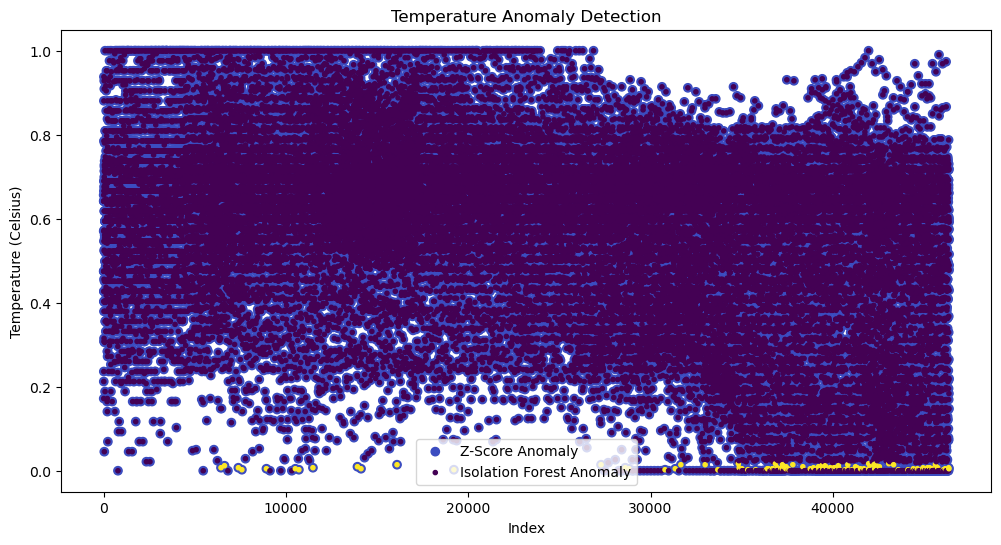

In [31]:
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Using Z-score for anomaly detection
df['z_score'] = (df['temperature_celsius'] - df['temperature_celsius'].mean()) / df['temperature_celsius'].std()
threshold = 3  # Common threshold for Z-score anomalies
df['z_anomaly'] = np.where(abs(df['z_score']) > threshold, 1, 0)

# Using Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
df['iso_anomaly'] = iso_forest.fit_predict(df[['temperature_celsius']])
df['iso_anomaly'] = df['iso_anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Visualizing anomalies
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['temperature_celsius'], c=df['z_anomaly'], cmap='coolwarm', label='Z-Score Anomaly')
plt.scatter(df.index, df['temperature_celsius'], c=df['iso_anomaly'], marker='.', label='Isolation Forest Anomaly')
plt.title('Temperature Anomaly Detection')
plt.xlabel('Index')
plt.ylabel('Temperature (Celsius)')
plt.legend()
plt.show()

# Linear regression

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression

# Feature engineering: Extract year, month, day from last_updated
df['year'] = df['last_updated'].dt.year
df['month'] = df['last_updated'].dt.month
df['day'] = df['last_updated'].dt.day

# Using 'temperature_celsius' as the target variable
target = 'temperature_celsius'
features = ['year', 'month', 'day']

# Dropping rows with missing target values if any
df = df.dropna(subset=[target])

# Splitting data into training and testing sets
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.15641374985745043
Mean Squared Error (MSE): 0.0378953393568603
R-squared (R2): 0.12570156913208397


# ARIMA model

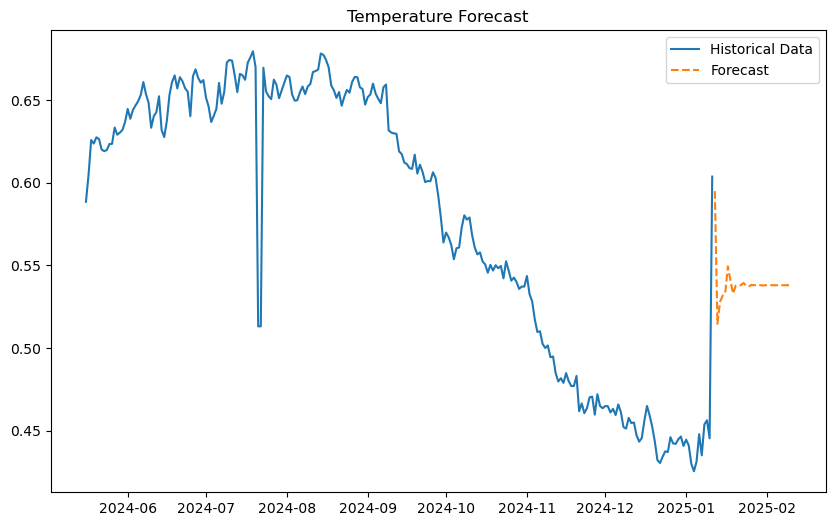

In [33]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

# Ensure `last_updated` is correctly converted to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'], errors='coerce')  # Handle parsing errors
df = df.dropna(subset=['last_updated'])  # Drop rows where last_updated couldn't be parsed

# Set `last_updated` as the index
df.set_index('last_updated', inplace=True)

# Resample the data (e.g., daily average for temperature)
df_resampled = df['temperature_celsius'].resample('D').mean()

# Fill missing values in the resampled data
df_resampled.fillna(method='ffill', inplace=True)

# ARIMA model
model = ARIMA(df_resampled, order=(5, 1, 0))
model_fit = model.fit()

# Forecast future values (e.g., next 30 days)
forecast = model_fit.forecast(steps=30)

# Plot the historical data and forecast
plt.figure(figsize=(10, 6))
plt.plot(df_resampled, label='Historical Data')
plt.plot(forecast, label='Forecast', linestyle='--')
plt.legend()
plt.title('Temperature Forecast')
plt.show()

# Normalizing Data

In [34]:
from sklearn.preprocessing import MinMaxScaler

numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
scaler = MinMaxScaler()

# Apply normalization
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print(df.head())

                     country     location_name  latitude  longitude  \
last_updated                                                          
2024-05-16 13:15:00        0             Kabul  0.731230   0.688026   
2024-05-16 10:45:00        1            Tirana  0.802572   0.547056   
2024-05-16 09:45:00        2           Algiers  0.754696   0.499162   
2024-05-16 10:45:00        3  Andorra La Vella  0.814829   0.494793   
2024-05-16 09:45:00        4            Luanda  0.276987   0.528236   

                           timezone  last_updated_epoch  temperature_celsius  \
last_updated                                                                   
2024-05-16 13:15:00      Asia/Kabul                 0.0             0.656325   
2024-05-16 10:45:00   Europe/Tirane                 0.0             0.474940   
2024-05-16 09:45:00  Africa/Algiers                 0.0             0.570406   
2024-05-16 10:45:00  Europe/Andorra                 0.0             0.171838   
2024-05-16 09:45:00   

C:\Users\srush\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:695: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmin(X, axis=axis))
C:\Users\srush\anaconda3\Lib\site-packages\sklearn\utils\_array_api.py:712: RuntimeWarning: All-NaN slice encountered
  return xp.asarray(numpy.nanmax(X, axis=axis))


# Z-Score Based Anomaly Detection

Total anomalies detected using Z-Score: 0


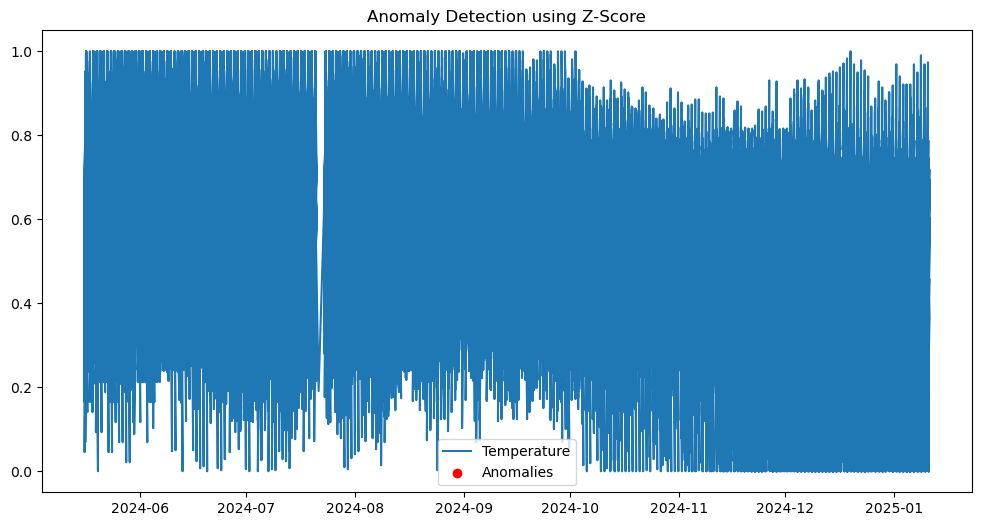

In [35]:
import numpy as np

# Select the feature for anomaly detection (e.g., temperature_celsius)
feature = 'temperature_celsius'

# Calculate Z-scores
df['z_score'] = (df[feature] - df[feature].mean()) / df[feature].std()

# Identify anomalies: Z-score greater than 3 or less than -3
df['z_anomaly'] = np.where((df['z_score'] > 3) | (df['z_score'] < -3), 1, 0)

# Count anomalies
z_anomalies_count = df['z_anomaly'].sum()
print(f"Total anomalies detected using Z-Score: {z_anomalies_count}")

# Visualize anomalies
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Temperature')
plt.scatter(df.index[df['z_anomaly'] == 1], df[feature][df['z_anomaly'] == 1], color='red', label='Anomalies')
plt.title('Anomaly Detection using Z-Score')
plt.legend()
plt.show()

Total anomalies detected using Isolation Forest: 106


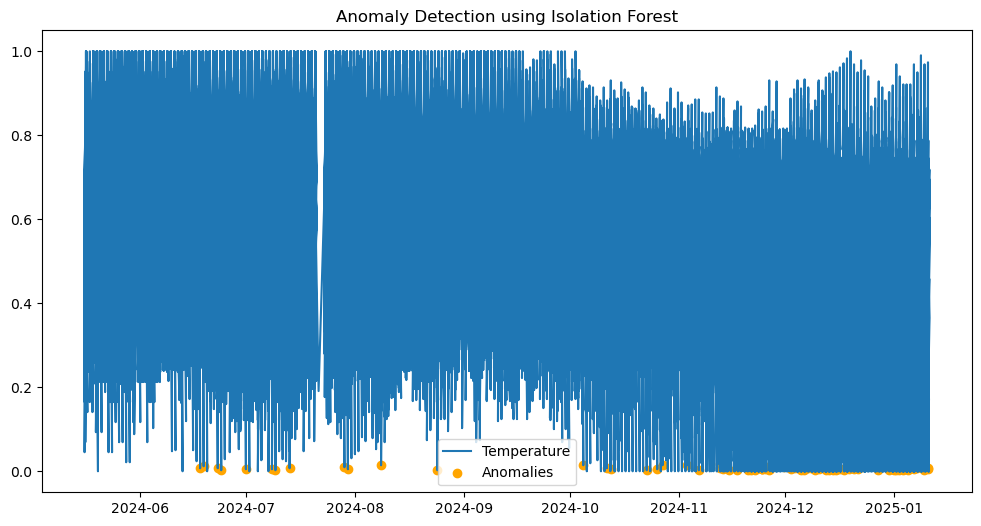

In [36]:
from sklearn.ensemble import IsolationForest

# Initialize Isolation Forest
iso_forest = IsolationForest(contamination=0.01, random_state=42)

# Fit the model to temperature data and predict anomalies
df['iso_anomaly'] = iso_forest.fit_predict(df[[feature]])

# Convert Isolation Forest output to binary (1 for anomaly, 0 for normal)
df['iso_anomaly'] = df['iso_anomaly'].apply(lambda x: 1 if x == -1 else 0)

# Count anomalies
iso_anomalies_count = df['iso_anomaly'].sum()
print(f"Total anomalies detected using Isolation Forest: {iso_anomalies_count}")

# Visualize anomalies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Temperature')
plt.scatter(df.index[df['iso_anomaly'] == 1], df[feature][df['iso_anomaly'] == 1], color='orange', label='Anomalies')
plt.title('Anomaly Detection using Isolation Forest')
plt.legend()
plt.show()

Total common anomalies detected by both methods: 0


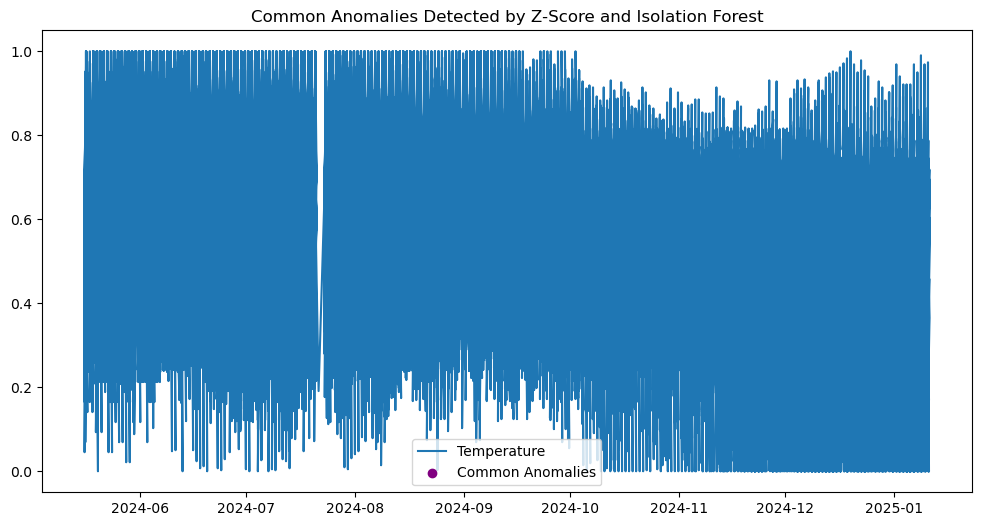

In [37]:
# Compare anomalies detected by both methods
common_anomalies = df[(df['z_anomaly'] == 1) & (df['iso_anomaly'] == 1)].shape[0]

print(f"Total common anomalies detected by both methods: {common_anomalies}")

# Visualize overlap
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[feature], label='Temperature')
plt.scatter(df.index[(df['z_anomaly'] == 1) & (df['iso_anomaly'] == 1)], 
            df[feature][(df['z_anomaly'] == 1) & (df['iso_anomaly'] == 1)], 
            color='purple', label='Common Anomalies')
plt.title('Common Anomalies Detected by Z-Score and Isolation Forest')
plt.legend()
plt.show()

# ARIMA MODEL

In [38]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error

# Train-test split for ARIMA
train_size = int(len(df[feature]) * 0.8)
train_arima = df[feature][:train_size]
test_arima = df[feature][train_size:]

# Build and train ARIMA model
arima_model = ARIMA(train_arima, order=(2, 1, 2))  # (p, d, q) can be tuned
arima_fit = arima_model.fit()

# Forecasting with ARIMA
arima_forecast = arima_fit.forecast(steps=len(test_arima))

# Evaluate ARIMA
arima_mae = mean_absolute_error(test_arima, arima_forecast)
print(f"ARIMA MAE: {arima_mae}")

C:\Users\srush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\srush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\srush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\srush\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\srush\anaconda3\Lib\site-

ARIMA MAE: 0.21403874194176326


# LSTM MODEL

In [39]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Normalize data for LSTM
scaler = MinMaxScaler(feature_range=(0, 1))
lstm_data = scaler.fit_transform(df[[feature]])

# Prepare data for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 30
X, y = create_sequences(lstm_data, seq_length)

# Train-test split
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build LSTM model
lstm_model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(seq_length, 1)),
    LSTM(50),
    Dense(1)
])

lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)

# Forecast with LSTM
lstm_forecast = lstm_model.predict(X_test)
lstm_forecast = scaler.inverse_transform(lstm_forecast)

# Evaluate LSTM
lstm_mae = mean_absolute_error(scaler.inverse_transform(y_test.reshape(-1, 1)), lstm_forecast)
print(f"LSTM MAE: {lstm_mae}")

C:\Users\srush\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 46s 33ms/step - loss: 0.0381
Epoch 2/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 0.0314
Epoch 3/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 0.0309
Epoch 4/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - loss: 0.0308
Epoch 5/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 40s 34ms/step - loss: 0.0308
Epoch 6/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 40s 35ms/step - loss: 0.0291
Epoch 7/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 0.0296
Epoch 8/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - loss: 0.0291
Epoch 9/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 39s 33ms/step - loss: 0.0278
Epoch 10/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - loss: 0.0263
Epoch 11/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 39s 34ms/step - loss: 0.0255
Epoch 12/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 37s 32ms/step - loss: 0.0234
Epoch 13/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 43s 37ms/step - loss: 0.0215
Epoch 14/20
1159/1159 ━━━━━━━━━━━━━━━━━━━━ 36s 31ms/step - loss: 0.0197
E

Ensemble MAE: 0.21719130180684232


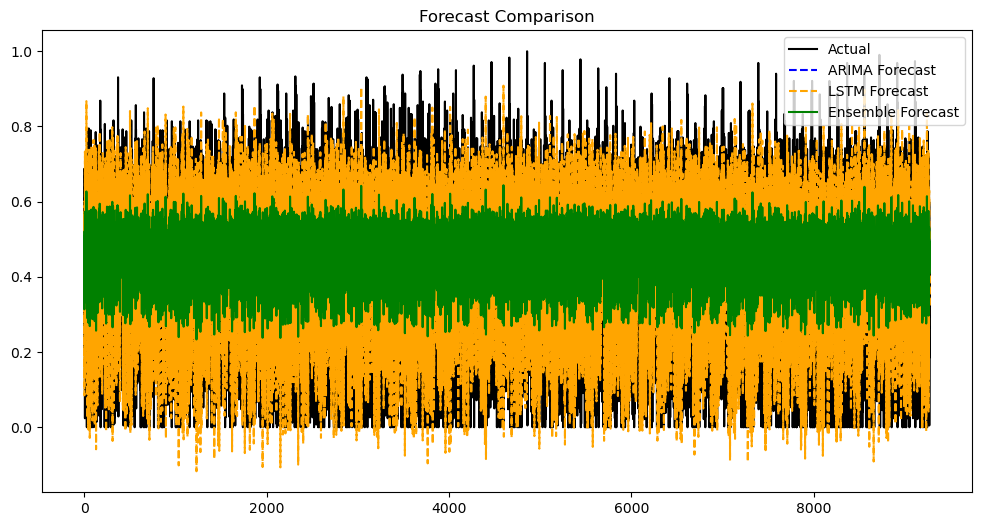

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error

# Check and ensure ARIMA and LSTM forecasts are numpy arrays
arima_forecast = np.array(arima_forecast).flatten()  # Convert to 1D
lstm_forecast = np.array(lstm_forecast).flatten()    # Convert to 1D
test_arima = np.array(test_arima).flatten()          # Ensure test data is 1D

# Find minimum length
min_length = min(len(arima_forecast), len(lstm_forecast), len(test_arima))

# Truncate all arrays to the same length
arima_forecast = arima_forecast[:min_length]
lstm_forecast = lstm_forecast[:min_length]
test_arima_truncated = test_arima[:min_length]

# Weighted average ensemble
weights = [0.6, 0.4]  # Adjust weights as needed
ensemble_forecast = (weights[0] * arima_forecast) + (weights[1] * lstm_forecast)

# Evaluate ensemble forecast
ensemble_mae = mean_absolute_error(test_arima_truncated, ensemble_forecast)
print(f"Ensemble MAE: {ensemble_mae}")

# Visualize the results
plt.figure(figsize=(12, 6))
plt.plot(test_arima_truncated, label='Actual', color='black')
plt.plot(arima_forecast, label='ARIMA Forecast', linestyle='--', color='blue')
plt.plot(lstm_forecast, label='LSTM Forecast', linestyle='--', color='orange')
plt.plot(ensemble_forecast, label='Ensemble Forecast', linestyle='-', color='green')
plt.title('Forecast Comparison')
plt.legend()
plt.show()

In [41]:
print(f"ARIMA Forecast Shape: {arima_forecast.shape}")
print(f"LSTM Forecast Shape: {lstm_forecast.shape}")
print(f"Test Data Shape: {test_arima.shape}")

ARIMA Forecast Shape: (9271,)
LSTM Forecast Shape: (9271,)
Test Data Shape: (9277,)


# Unique Analyses

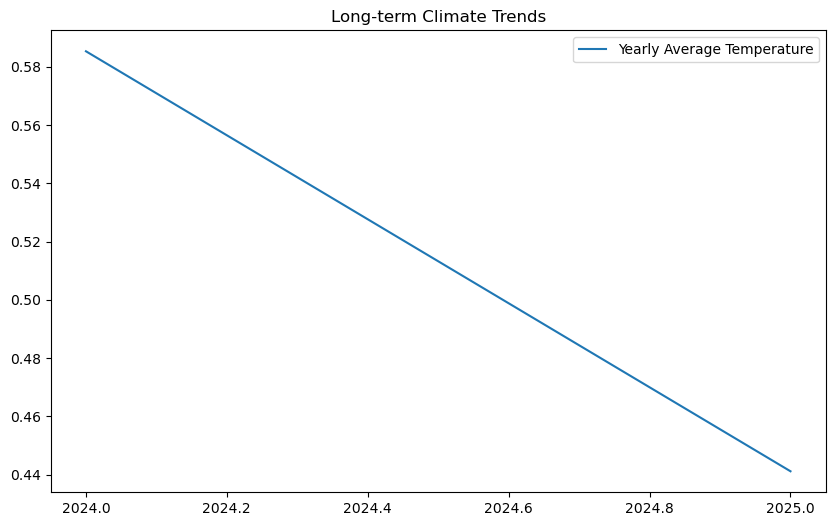

In [42]:
#Climate Analysis
df['year'] = df.index.year
yearly_avg_temp = df.groupby('year')['temperature_celsius'].mean()
plt.figure(figsize=(10, 6))
plt.plot(yearly_avg_temp, label='Yearly Average Temperature')
plt.legend()
plt.title('Long-term Climate Trends')
plt.show()

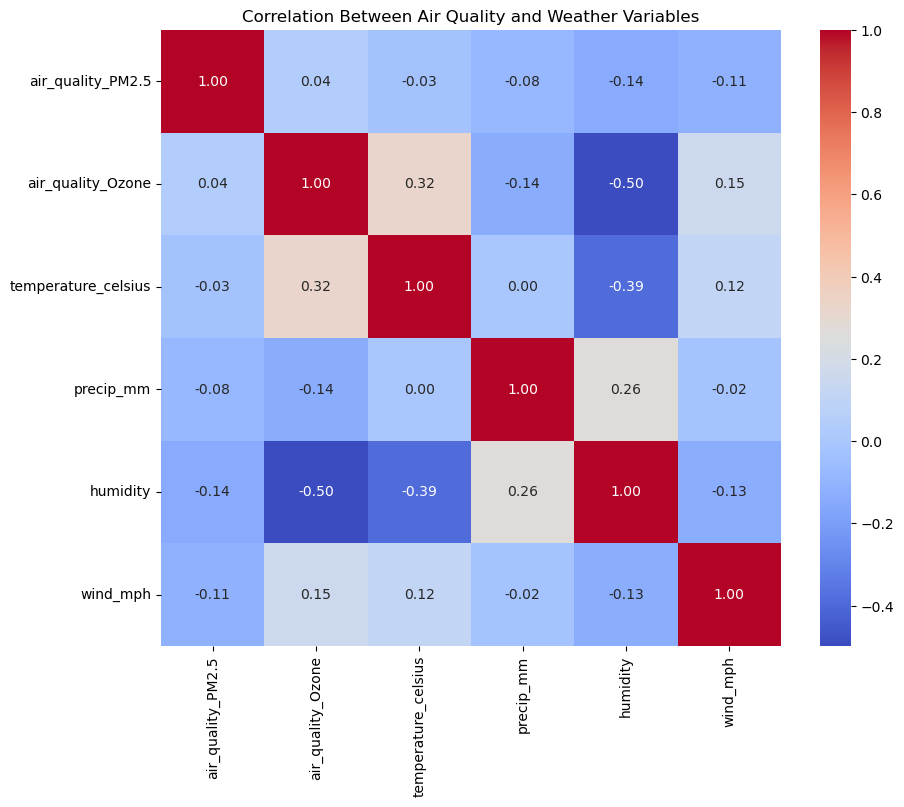

In [43]:
#correlation between air quality and weather:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_columns = [
    'air_quality_PM2.5',  # PM2.5 levels
    'air_quality_Ozone',  # Ozone levels
    'temperature_celsius',  # Temperature in Celsius
    'precip_mm',  # Precipitation in mm
    'humidity',  # Humidity percentage
    'wind_mph'  # Wind speed in mph
]

available_columns = [col for col in correlation_columns if col in df.columns]
if len(available_columns) < len(correlation_columns):
    print(f"Warning: Some columns are missing: {set(correlation_columns) - set(available_columns)}")

# Computing correlation for columns
correlation = df[available_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Between Air Quality and Weather Variables')
plt.show()

Feature Importances:
                       Feature    Importance
85                     z_score  8.747999e-01
4       temperature_fahrenheit  8.336925e-02
14          feels_like_celsius  4.179670e-02
15       feels_like_fahrenheit  3.394827e-05
87                 iso_anomaly  1.216704e-07
...                        ...           ...
353   timezone_Africa/Gaborone -2.904582e-18
1683         moonrise_02:29 AM -2.924042e-18
273        location_name_Praia -4.213201e-18
1826         moonrise_03:40 PM -4.796007e-18
1142           sunset_05:41 PM -4.898080e-18

[4392 rows x 2 columns]


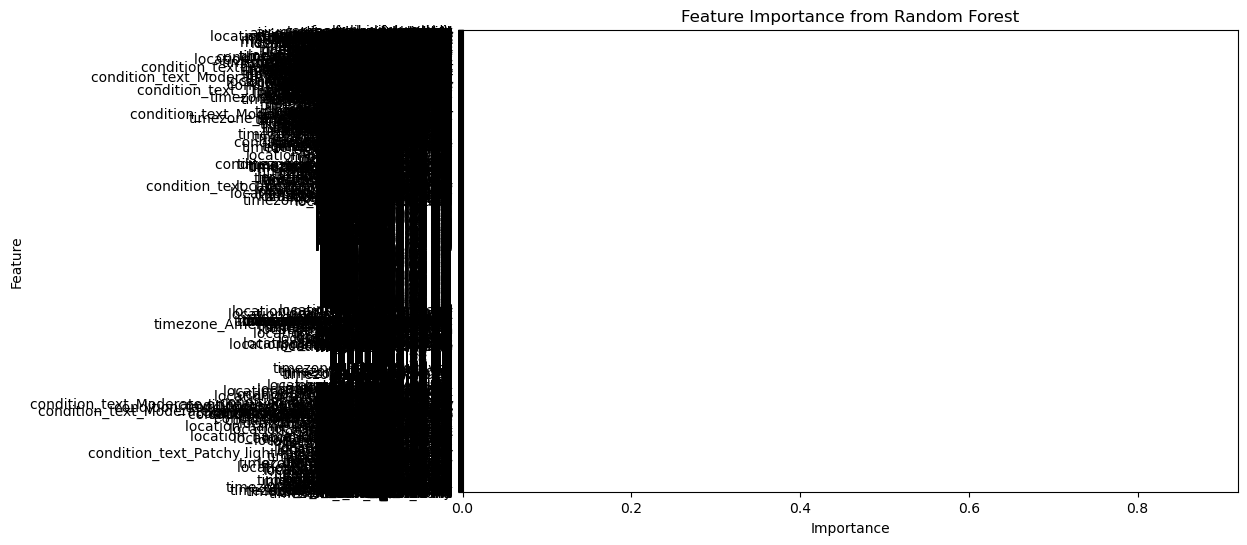

Random Forest MAE: 7.869694934996066e-06


In [44]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

# Convert categorical columns to numeric using one-hot encoding
X = pd.get_dummies(df.drop(columns=['temperature_celsius']), drop_first=True)
y = df['temperature_celsius']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)

# Evaluate feature importance
importances = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': importances}).sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(feature_importance_df)

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance from Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

# Evaluate model performance
y_pred = rf.predict(X_test)
rf_mae = mean_absolute_error(y_test, y_pred)
print(f"Random Forest MAE: {rf_mae}")

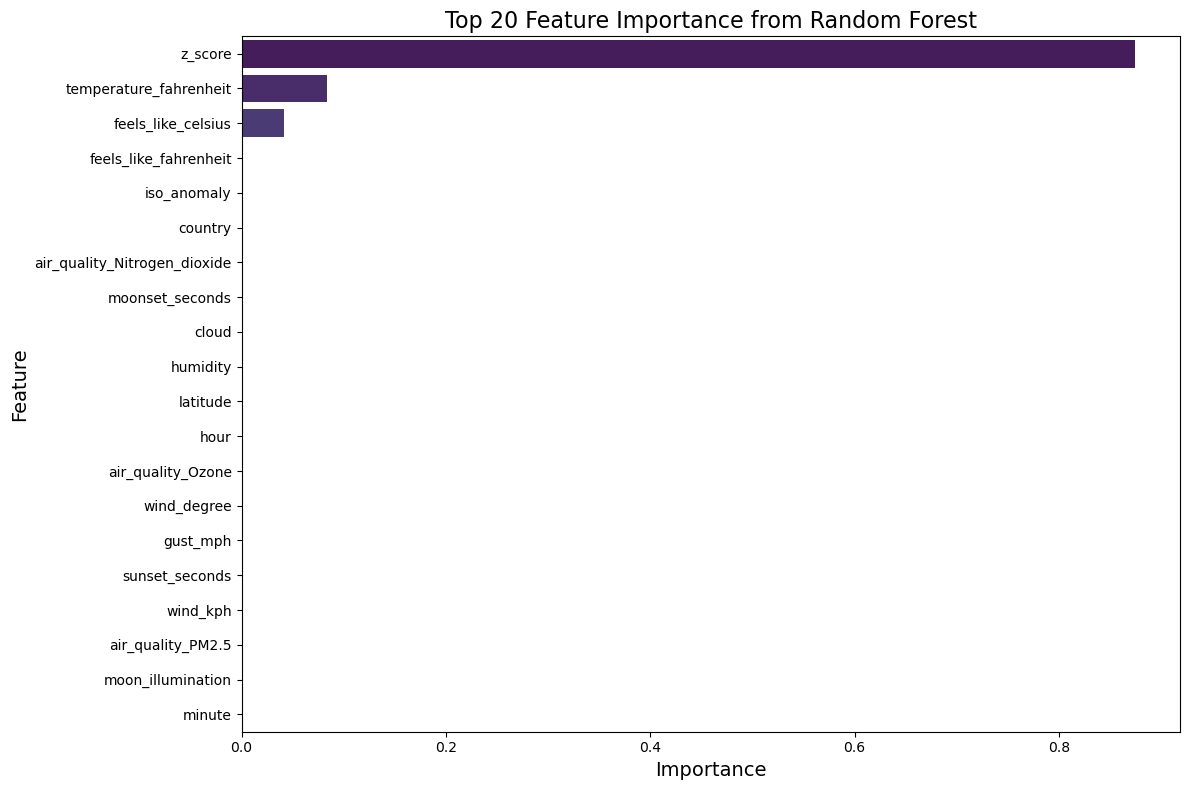

In [45]:
# Select top 20 most important features
top_n = 20 
top_features = feature_importance_df.head(top_n)

# Plot the top features
plt.figure(figsize=(12, 8))  
sns.barplot(x='Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 20 Feature Importance from Random Forest', fontsize=16)
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()  
plt.show()

In [46]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

world = gpd.read_file("ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp")  # Update the path to your downloaded file

print(world.head())

        featurecla  scalerank  LABELRANK SOVEREIGNT SOV_A3  ADM0_DIF  LEVEL  \
0  Admin-0 country          1          3   Zimbabwe    ZWE         0      2   
1  Admin-0 country          1          3     Zambia    ZMB         0      2   
2  Admin-0 country          1          3      Yemen    YEM         0      2   
3  Admin-0 country          3          2    Vietnam    VNM         0      2   
4  Admin-0 country          5          3  Venezuela    VEN         0      2   

                TYPE TLC      ADMIN  ... FCLASS_TR  FCLASS_ID FCLASS_PL  \
0  Sovereign country   1   Zimbabwe  ...      None       None      None   
1  Sovereign country   1     Zambia  ...      None       None      None   
2  Sovereign country   1      Yemen  ...      None       None      None   
3  Sovereign country   1    Vietnam  ...      None       None      None   
4  Sovereign country   1  Venezuela  ...      None       None      None   

  FCLASS_GR  FCLASS_IT FCLASS_NL FCLASS_SE  FCLASS_BD FCLASS_UA  \
0      

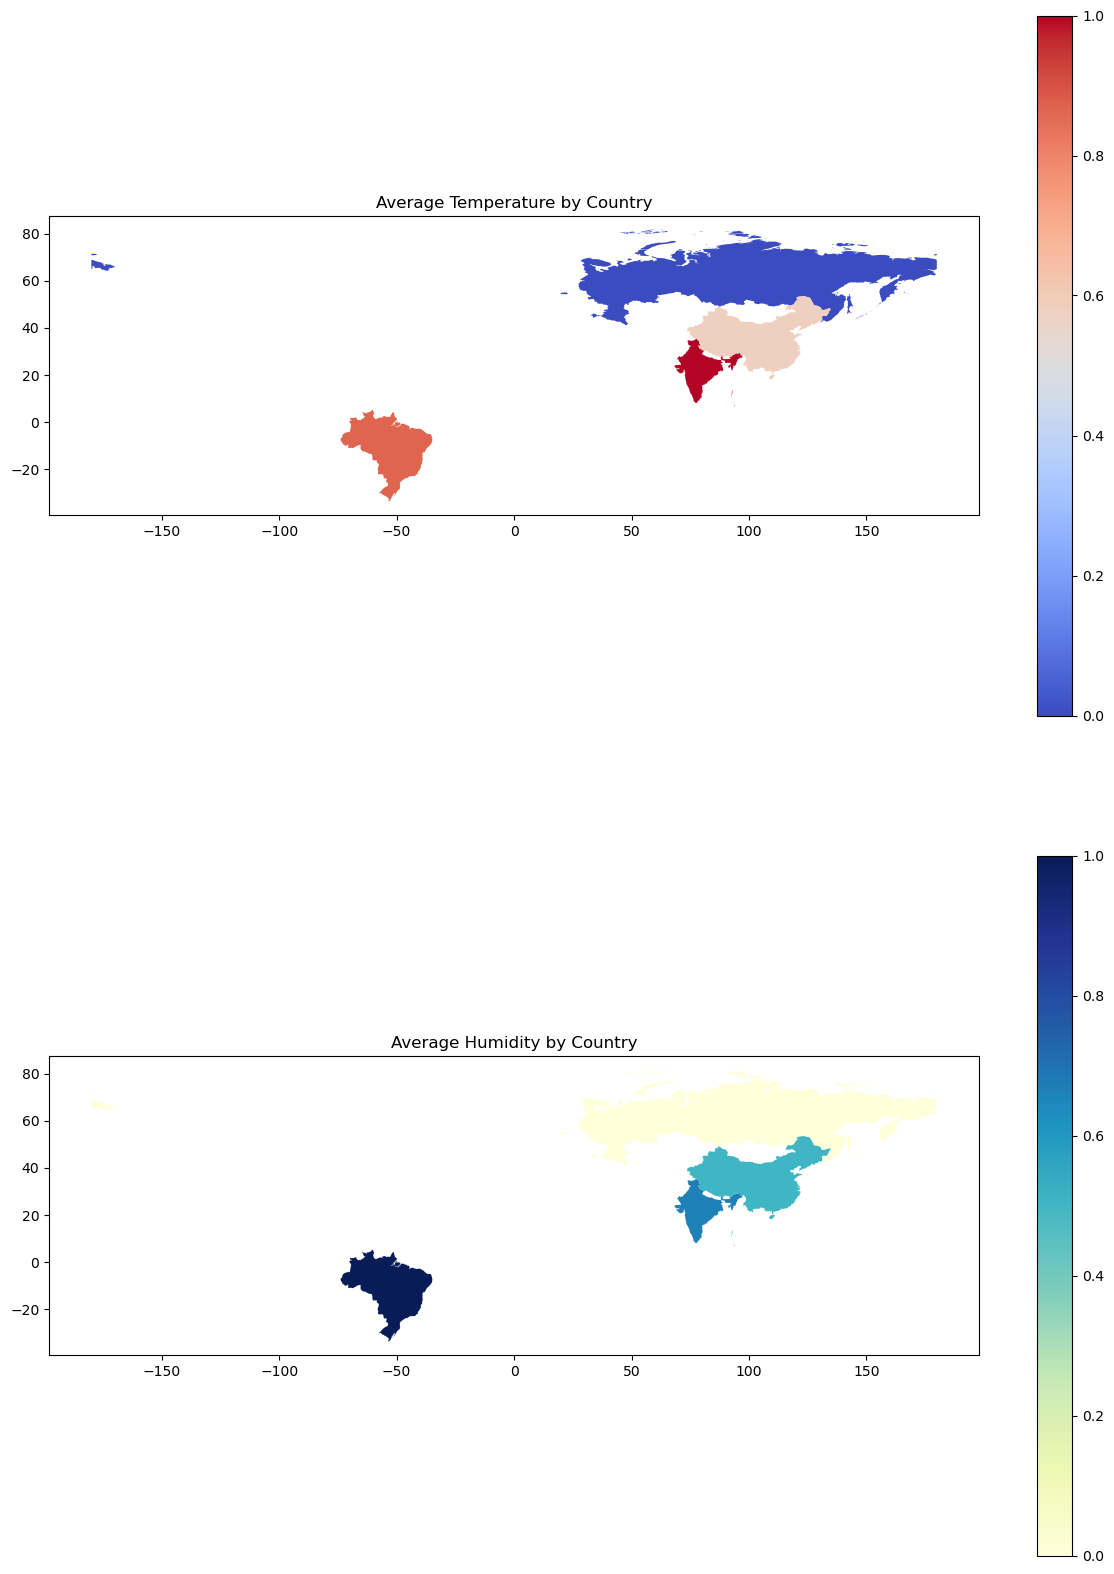

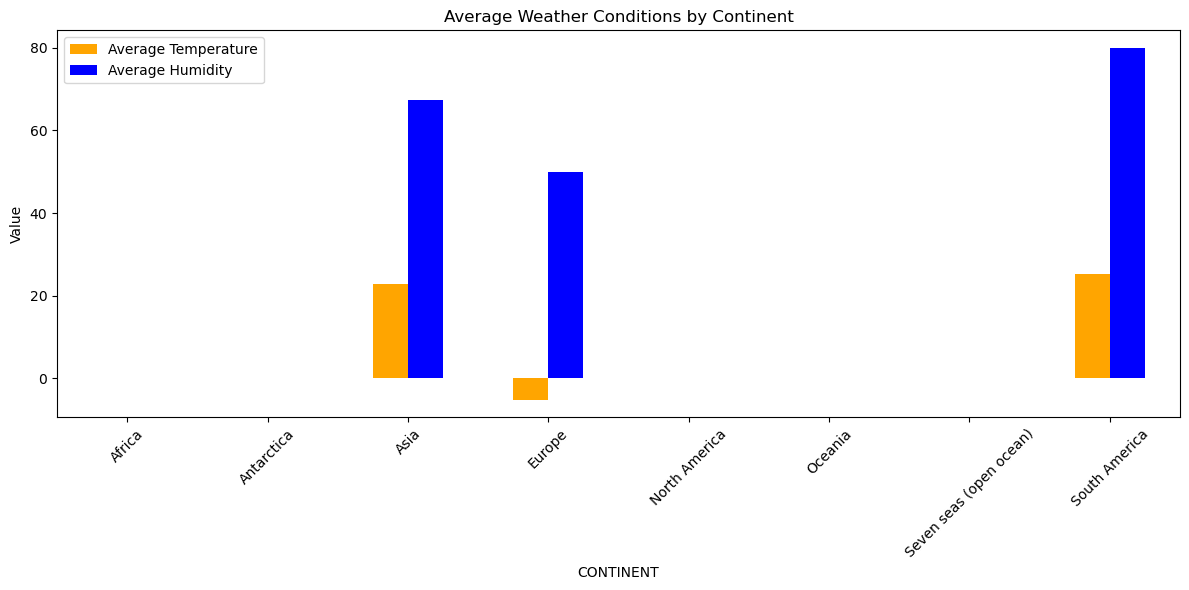

In [47]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load the Natural Earth shapefile
world = gpd.read_file("ne_50m_admin_0_countries/ne_50m_admin_0_countries.shp")  # Update the path if necessary

# Step 2: Load or create the weather dataset
# Replace with the actual weather data CSV if available
weather_summary = pd.DataFrame({
    "country": ["United States", "Brazil", "India", "Russia", "China"],  # Example countries
    "avg_temp": [22.5, 25.3, 30.1, -5.2, 15.3],  # Example average temperatures
    "avg_humidity": [60, 80, 70, 50, 65]  # Example average humidity
})

# Step 3: Merge the world map data with the weather dataset
world_weather = world.merge(weather_summary, left_on="ADMIN", right_on="country", how="left")

# Step 4: Normalize the weather data for visualization
world_weather["norm_temp"] = (world_weather["avg_temp"] - world_weather["avg_temp"].min()) / (
        world_weather["avg_temp"].max() - world_weather["avg_temp"].min()
)
world_weather["norm_humidity"] = (world_weather["avg_humidity"] - world_weather["avg_humidity"].min()) / (
        world_weather["avg_humidity"].max() - world_weather["avg_humidity"].min()
)

# Step 5: Plot the data
fig, axs = plt.subplots(2, 1, figsize=(15, 20))

# Plot 1: Average Temperature
world_weather.plot(
    column="norm_temp",
    cmap="coolwarm",
    legend=True,
    ax=axs[0]
)
axs[0].set_title("Average Temperature by Country")

# Plot 2: Average Humidity
world_weather.plot(
    column="norm_humidity",
    cmap="YlGnBu",
    legend=True,
    ax=axs[1]
)
axs[1].set_title("Average Humidity by Country")

# Step 6: Aggregate by continent and plot bar charts
continent_summary = world_weather.groupby("CONTINENT")[["avg_temp", "avg_humidity"]].mean().reset_index()

fig2, ax2 = plt.subplots(figsize=(12, 6))
continent_summary.plot(
    x="CONTINENT",
    y=["avg_temp", "avg_humidity"],
    kind="bar",
    ax=ax2,
    color=["orange", "blue"]
)
ax2.set_title("Average Weather Conditions by Continent")
ax2.set_ylabel("Value")
ax2.legend(["Average Temperature", "Average Humidity"])
plt.xticks(rotation=45)

# Show plots
plt.tight_layout()
plt.show()